In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<h3> Data Loading & Analysis </h3>

In [2]:
df = pd.read_csv("heart.csv")

# The shape of the data
print("The shape of the dataset is : ", df.shape)

# Preview of the first 5 rows of the data
df.head()

The shape of the dataset is :  (303, 14)


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
# Checking the number of unique values in each column

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

unique count
age                 41
sex                  2
cp                   4
trtbps              49
chol               152
fbs                  2
restecg              3
thalachh            91
exng                 2
oldpeak             40
slp                  3
caa                  5
thall                4
output               2

In [4]:
# Separating the columns in categorical and continuous

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [5]:
# Summary statistics

df[con_cols].describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2

In [6]:
# Missing values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<h3>Exploratory Data Analysis</h3>

In [13]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [14]:
# Scaling and Encoding features

# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


age  trtbps      chol  thalachh  oldpeak  sex_1  exng_1  caa_1  caa_2  \
0  0.592593    0.75 -0.110236 -0.092308   0.9375      1       0      0      0   
1 -1.333333    0.00  0.157480  1.046154   1.6875      1       0      0      0   
2 -1.037037    0.00 -0.566929  0.584615   0.3750      0       0      0      0   
3  0.074074   -0.50 -0.062992  0.769231   0.0000      1       0      0      0   
4  0.148148   -0.50  1.795276  0.307692  -0.1250      0       1      0      0   

   caa_3  ...  cp_2  cp_3  fbs_1  restecg_1  restecg_2  slp_1  slp_2  thall_1  \
0      0  ...     0     1      1          0          0      0      0        1   
1      0  ...     1     0      0          1          0      0      0        0   
2      0  ...     0     0      0          0          0      0      1        0   
3      0  ...     0     0      0          1          0      0      1        0   
4      0  ...     0     0      0          1          0      0      1        0   

   thall_2  thall_3  
0        0        0  
1        1        0  
2        1        0  
3        1        0  
4        1        0  

[5 rows x 22 columns]

In [16]:
# Train and test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ",X_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of X_train is:  (242, 22)
The shape of X_test is:  (61, 22)
The shape of y_train is:  (242, 1)
The shape of y_test is:  (61, 1)


## Classification - Linear & Tree Classifiers

<h4>Support Vector Machines</h4>

In [17]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

The test accuracy score of SVM is  0.8688524590163934
Classification Report: 
               precision    recall  f1-score   support

           0     0.8387    0.8966    0.8667        29
           1     0.9000    0.8438    0.8710        32

    accuracy                         0.8689        61
   macro avg     0.8694    0.8702    0.8688        61
weighted avg     0.8709    0.8689    0.8689        61



<h4>Logistic Regression</h4>

The test accuracy score of Logistric Regression is  0.9016393442622951
Classification Report: 
               precision    recall  f1-score   support

           0     0.8710    0.9310    0.9000        29
           1     0.9333    0.8750    0.9032        32

    accuracy                         0.9016        61
   macro avg     0.9022    0.9030    0.9016        61
weighted avg     0.9037    0.9016    0.9017        61



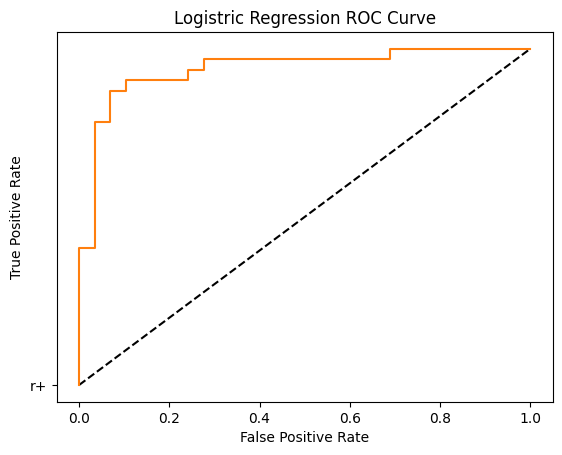

In [18]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

<h4>Decision Tree Classifier</h4>

In [20]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 9)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

The test accuracy score of Decision Tree is  0.7540983606557377
Classification Report: 
               precision    recall  f1-score   support

           0     0.7188    0.7931    0.7541        29
           1     0.7931    0.7188    0.7541        32

    accuracy                         0.7541        61
   macro avg     0.7559    0.7559    0.7541        61
weighted avg     0.7578    0.7541    0.7541        61



<h4>Random Forest Classifier</h4>

In [21]:
# instantiating the object
rf = RandomForestClassifier(random_state=6)

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

The test accuracy score of Random Forest is  0.8524590163934426
Classification Report: 
               precision    recall  f1-score   support

           0     0.8125    0.8966    0.8525        29
           1     0.8966    0.8125    0.8525        32

    accuracy                         0.8525        61
   macro avg     0.8545    0.8545    0.8525        61
weighted avg     0.8566    0.8525    0.8525        61



<h4>Gradient Boosting Classifier</h4>

In [52]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=6)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred, digits=4))

The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934
Classification Report: 
               precision    recall  f1-score   support

           0     0.8182    0.9310    0.8710        29
           1     0.9286    0.8125    0.8667        32

    accuracy                         0.8689        61
   macro avg     0.8734    0.8718    0.8688        61
weighted avg     0.8761    0.8689    0.8687        61



In [71]:
# evaluate a weighted average ensemble for classification
from sklearn.ensemble import VotingClassifier

# get a list of base models
def get_models():
    models = list()
    models.append(('svm', SVC(kernel='linear', C=1, random_state=1, probability=True)))
    models.append(('lr', LogisticRegression()))
    models.append(('dt', DecisionTreeClassifier(random_state=9)))
    models.append(('rf', RandomForestClassifier(random_state=6)))
    models.append(('gb', GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=6)))
    return models

# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
    # fit and evaluate the models
    scores = list()
    for name, model in models:
        # fit the model
        model.fit(X_train, y_train)
        # evaluate the model
        yhat = model.predict(X_val)
        acc = accuracy_score(y_val, yhat)
        # store the performance
        scores.append(round(acc*100, 3))
        # report model performance
    return scores


# create the base models
models = get_models()

# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
print("Accuarcy Scores of models: ",scores)
[4,5,2,3,4]

# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='hard', weights=scores)

# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)

# make predictions on test set
yhat = ensemble.predict(X_test)

# evaluate predictions
score = round(accuracy_score(y_test, yhat)*100, 3)

print('Weighted Avg Accuracy: %.3f' % (score))
print("Improvement: ", round(score - max(scores), 3))
print("Classification Report: \n", classification_report(y_test, yhat, digits=4))

Accuarcy Scores of models:  [86.885, 90.164, 75.41, 85.246, 86.885]
Weighted Avg Accuracy: 90.164
Improvement:  0.0
Classification Report: 
               precision    recall  f1-score   support

           0     0.8710    0.9310    0.9000        29
           1     0.9333    0.8750    0.9032        32

    accuracy                         0.9016        61
   macro avg     0.9022    0.9030    0.9016        61
weighted avg     0.9037    0.9016    0.9017        61

